# CAPSTONE PROJECT- GROUP 5

CROP YIELD PREDICTION ANALYSIS

### Introduction
Climate change presents a profound challenge to agricultural productivity worldwide. The frequency of extreme weather events, variability in rainfall patterns, and shifts in temperature are all contributing to increasing uncertainty in agricultural outputs. In regions heavily reliant on agriculture, such as many parts of Kenya, the impact of these changes can have severe implications not just for local economies, but also for food security and overall societal stability.

### Project Overview
This project aims to leverage extensive meteorological and agricultural data to analyze the impacts of climate change on crop yields. By examining historical data and identifying patterns and trends, the project seeks to forecast future conditions and provide actionable insights that can help mitigate the adverse effects of climate change on agriculture.

#### Business Problem
The primary challenge addressed by this project is the need for enhanced predictive capabilities that can accurately forecast the impacts of various climatic factors on crop yields. Current agricultural planning and operations often rely on traditional knowledge and simplistic predictive models that fail to account for the increasing complexity and variability introduced by climate change.

#### Stakeholders
Farmers and Agricultural Cooperatives: Direct beneficiaries who require accurate predictions to make informed decisions about crop planning and resource allocation.
Government Agencies: Need insights to formulate effective agricultural policies and climate adaptation strategies.
Agricultural Researchers and Academics: Interested in data-driven insights to enhance scientific understanding and develop more resilient agricultural practices.
NGOs and International Aid Organizations: Require accurate forecasts to better target their support and interventions in regions most affected by climate change.
#### Objectives
Analyze Historical Data: Understand how temperature, rainfall, and other factors have historically affected crop yields.
Develop Predictive Models: Create robust models that can predict crop yields based on various climatic inputs.
Provide Decision Support: Offer actionable recommendations that can help stakeholders adjust to changing conditions more effectively.
Enhance Climate Resilience: Contribute to building a more climate-resilient agricultural sector by integrating advanced analytics into farming practices.
##### Research Questions
How do variations in temperature and rainfall correlate with changes in crop yields?
Which crops are most vulnerable to changes in specific climatic factors?
Can we predict crop yield changes based on forecasted weather patterns?
What are the most effective strategies for mitigating adverse climate impacts on agriculture?

In [1]:
!pip install pandas


In [116]:
# Importung the relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns 

In [35]:
rainfall="C:/Users/ENVY x360/Flatiron/course_materials/Phase 5 project/rainfall.csv"
pesticides_df = "C:/Users/ENVY x360/Flatiron/course_materials/Phase 5 project/pesticides.csv"
temperature_df = "C:/Users/ENVY x360/Flatiron/course_materials/Phase 5 project/temp.csv"
yield_df = "C:/Users/ENVY x360/Flatiron/course_materials/Phase 5 project/yield_df.csv"
yield_csv = "C:/Users/ENVY x360/Flatiron/course_materials/Phase 5 project/yield.csv"

In [36]:
# Loading the datasets
rainfall_df=pd.read_csv('rainfall.csv')
pesticides_df = pd.read_csv('pesticides_df.csv')
temperature_df = pd.read_csv('temparature_df.csv')
yield_df = pd.read_csv('yield_df.csv')


In [37]:
# Checking the first five rows to ascertain the daa loaded well
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [38]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [39]:
# Dropping the 'Unnamed: 0' column from the DataFrame
yield_df = yield_df.drop(columns=['Unnamed: 0'])

# Verifying that the column has been dropped
print(yield_df.head())


      Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37  


In [40]:
# printing the number of rows and columns
yield_df.shape

(28242, 7)

In [41]:
# Obtaining decriptive statistics
yield_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


#### Observations 

- The maximum crop yield is 501,412 metric tons/hectare, while the minimum is 50 metric tons/hectare. Average yield is approximately 77,053.33 metric tons/hectare.
- Annual rainfall rang from a minimum of 51 mm/year to a maximum of 3,240 mm/year. Average annual rainfall was about 1,149.06 mm/year.
- Pesticide usage ranges from 0.04 tonnes to 367,778 tonnes. Average pesticide use was around 37,076.91 tonnes.
- Temperatures range from 1.30°C to 30.65°C with an average of approximately 20.54°C.

In [42]:
# frequency count of unique values in the Area
yield_df['Area'].value_counts()

India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Australia      966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: Area, Length: 101, dtype: int64

#### Observation 

- India is the most frequent ,followed by Brazil and Mexico


Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64


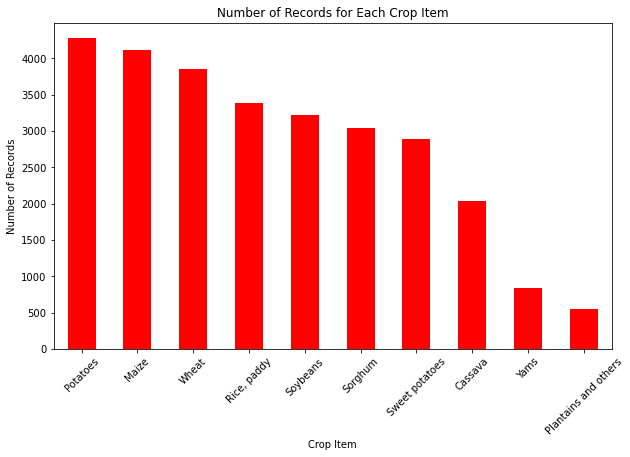

In [43]:
# calculating the frequency of crops
print (yield_df['Item'].value_counts())
    
# Get the value counts of 'Item' column
item_counts = yield_df['Item'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='red')
plt.title('Number of Records for Each Crop Item')
plt.xlabel('Crop Item')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()


####  Observations
- Potatoes are the most popular crop followed by Maize and Wheat

In [44]:
# Checking for missing values 
yield_df.isna().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [45]:
# Checking for duplicate entries
yield_df.duplicated().sum()

2310

In [46]:
# Displaying some duplicate rows to understand their nature
print(yield_df[yield_df.duplicated(keep=False)].sort_values(by=['Area', 'Year', 'Item']).head())


            Area         Item  Year  hg/ha_yield  \
2082  Bangladesh        Maize  1990        10015   
2083  Bangladesh        Maize  1990        10015   
2084  Bangladesh     Potatoes  1990        91410   
2085  Bangladesh     Potatoes  1990        91410   
2086  Bangladesh  Rice, paddy  1990        25661   

      average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
2082                         2666.0             1266.0     25.98  
2083                         2666.0             1266.0     25.98  
2084                         2666.0             1266.0     25.98  
2085                         2666.0             1266.0     25.98  
2086                         2666.0             1266.0     25.98  


In [47]:
# Remove duplicates considering specific columns that define a unique entry
yield_df = yield_df.drop_duplicates(subset=['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])

# Verify the removal by checking for duplicates again
print("Remaining duplicates:", yield_df.duplicated(subset=['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']).sum())


Remaining duplicates: 0


In [48]:
# Check the new shape of the DataFrame
print("Updated DataFrame shape:", yield_df.shape)


Updated DataFrame shape: (25932, 7)


In [49]:
# Checking for data information
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [50]:
# frequency count of unique values in the pesticides category
yield_df['pesticides_tonnes'].value_counts()

1597.00     708
34468.93    616
79821.18    378
26857.00    273
88.00       162
           ... 
12.59         1
12.12         1
12.75         1
12.16         1
12.24         1
Name: pesticides_tonnes, Length: 1673, dtype: int64

In [51]:
# frequency count of unique values in the average rainfall
yield_df['average_rain_fall_mm_per_year'].value_counts()

1083.0    3384
1761.0    1854
758.0     1280
494.0      966
534.0      966
          ... 
626.0       42
641.0       42
847.0       39
83.0        29
241.0       24
Name: average_rain_fall_mm_per_year, Length: 100, dtype: int64

In [52]:
# Group by 'Area', sum the yields, and find the top 10 countries with the highest total yields
top_countries_by_yield = yield_df.groupby('Area', sort=True)['hg/ha_yield'].sum().nlargest(10)

# Display the result
print(top_countries_by_yield)


Area
India             274219558
Brazil            136340329
Mexico            113698872
Australia         109111062
Japan             100924145
Indonesia          68067328
Turkey             52263950
Pakistan           49264956
Spain              46773540
United Kingdom     44335992
Name: hg/ha_yield, dtype: int64


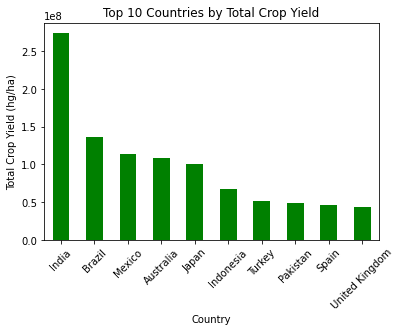

In [53]:
# Plotting the result
top_countries_by_yield.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Total Crop Yield')
plt.xlabel('Country')
plt.ylabel('Total Crop Yield (hg/ha)')
plt.xticks(rotation=45)
plt.show()


##### India has the highest crop yeilds followed by Brazil and mexico 

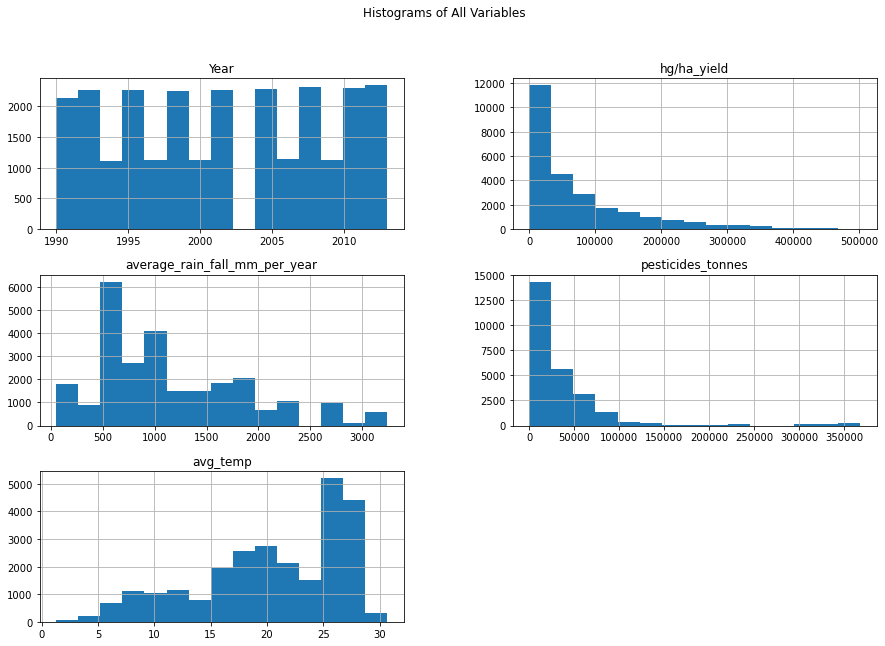

In [54]:
# Histograms for all numeric data
yield_df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of All Variables')
plt.show()


The average yeild is between 0 and 100000 hg/ha ,the average rainfall is between 500 and 1500,the average pesticide used is between 0-50000tons and the average temperature is between 25 and 28C.

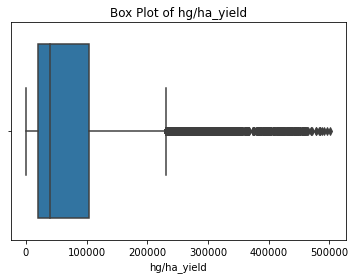

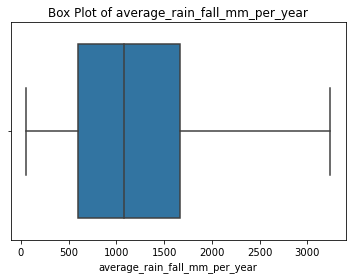

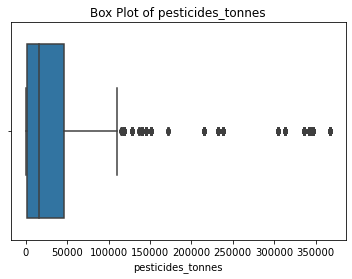

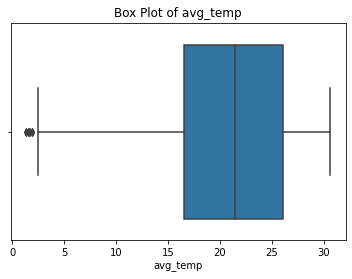

In [55]:
# Box plots to identify outliers
for column in ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=yield_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

- There is presence of outlier in the data and therefore some transformations are needed before modeling

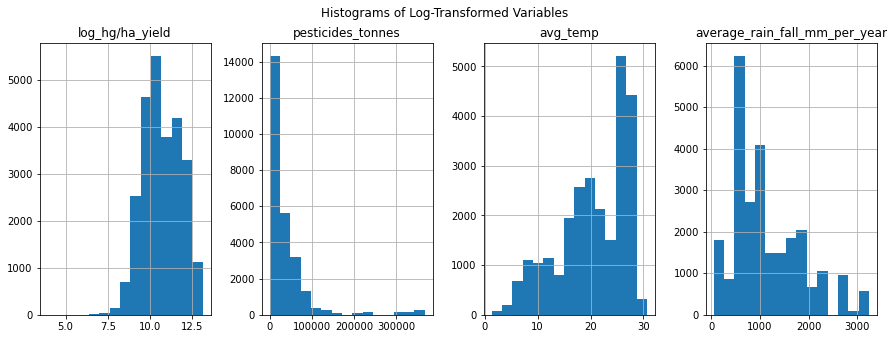

In [117]:
# Adding 1 to ensure there are no log(0) issues
yield_df['log_hg/ha_yield'] = np.log1p(yield_df['hg/ha_yield']) 


# Updated list of variables to plot
variables_transformed = ['log_hg/ha_yield', 'pesticides_tonnes', 'avg_temp','average_rain_fall_mm_per_year']

# Replotting histograms to check improvements
yield_df[variables_transformed].hist(bins=15, figsize=(15, 5), layout=(1, 4))
plt.suptitle('Histograms of Log-Transformed Variables')
plt.show()


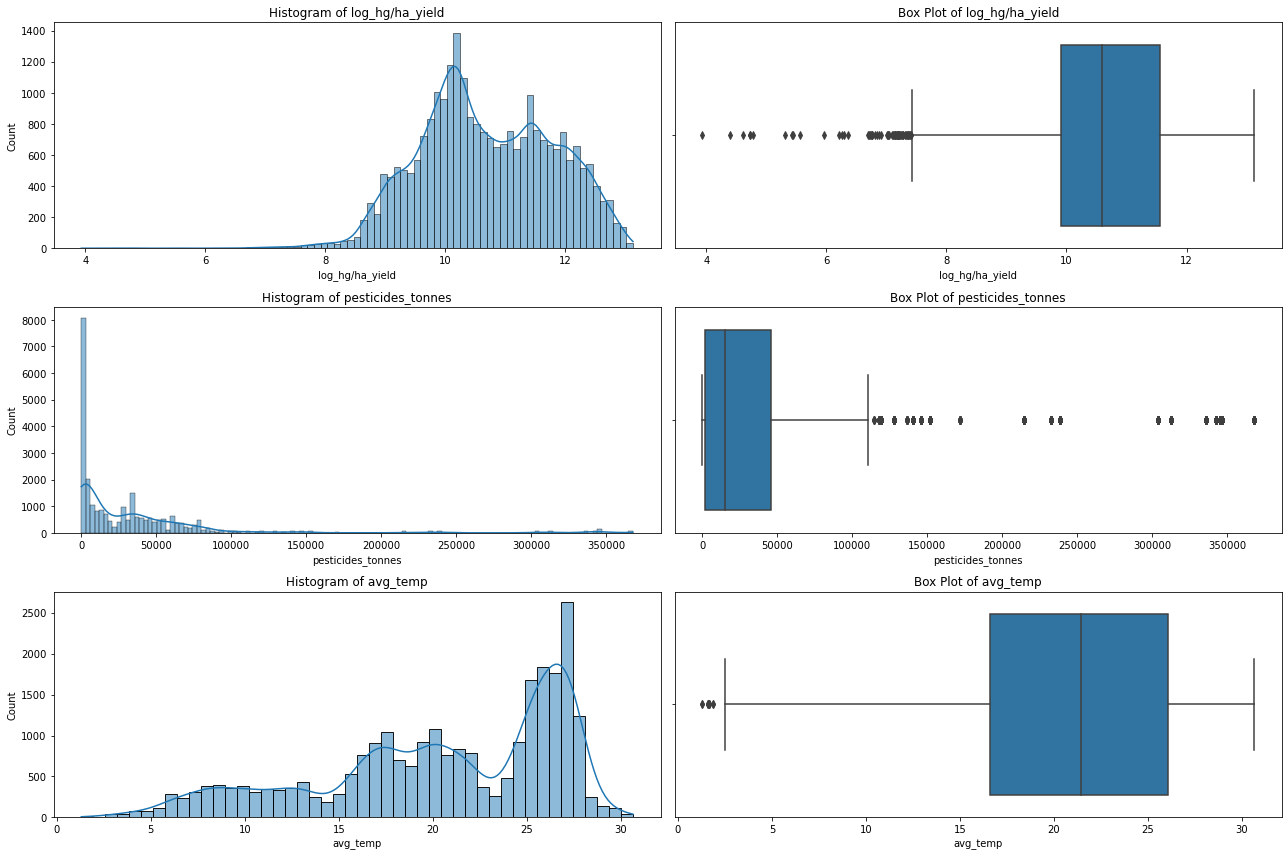

In [58]:
# List of transformed variables to plot
variables_transformed = ['log_hg/ha_yield', 'pesticides_tonnes', 'avg_temp']

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Number of rows needed for subplots
num_vars = len(variables_transformed)
rows = num_vars

# Loop through the list of variables and create a subplot for each histogram and box plot
for i, var in enumerate(variables_transformed, 1):
    plt.subplot(rows, 2, 2 * i - 1)  # Odd index for histograms
    sns.histplot(yield_df[var], kde=True)
    plt.title(f'Histogram of {var}')
    
    plt.subplot(rows, 2, 2 * i)  # Even index for box plots
    sns.boxplot(x=yield_df[var])
    plt.title(f'Box Plot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()


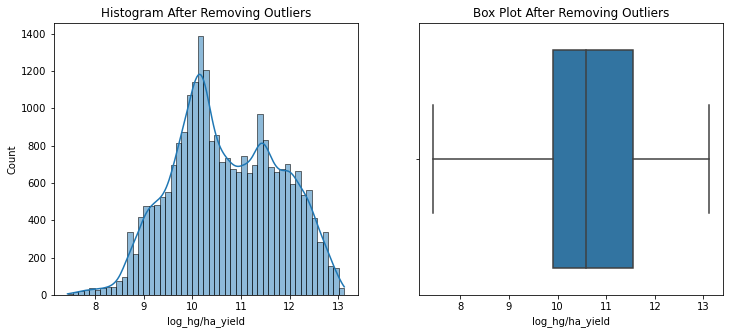

In [59]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to the log-transformed yield
cleaned_df = remove_outliers(yield_df, 'log_hg/ha_yield')

# Plotting to verify removal of outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(cleaned_df['log_hg/ha_yield'], kde=True)
plt.title('Histogram After Removing Outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_df['log_hg/ha_yield'])
plt.title('Box Plot After Removing Outliers')
plt.show()


### Trend analysis 

In [60]:
# Convert 'Year' to a datetime type if necessary and sort the data
yield_df['Year'] = pd.to_datetime(yield_df['Year'], format='%Y')
yield_df.sort_values('Year', inplace=True)


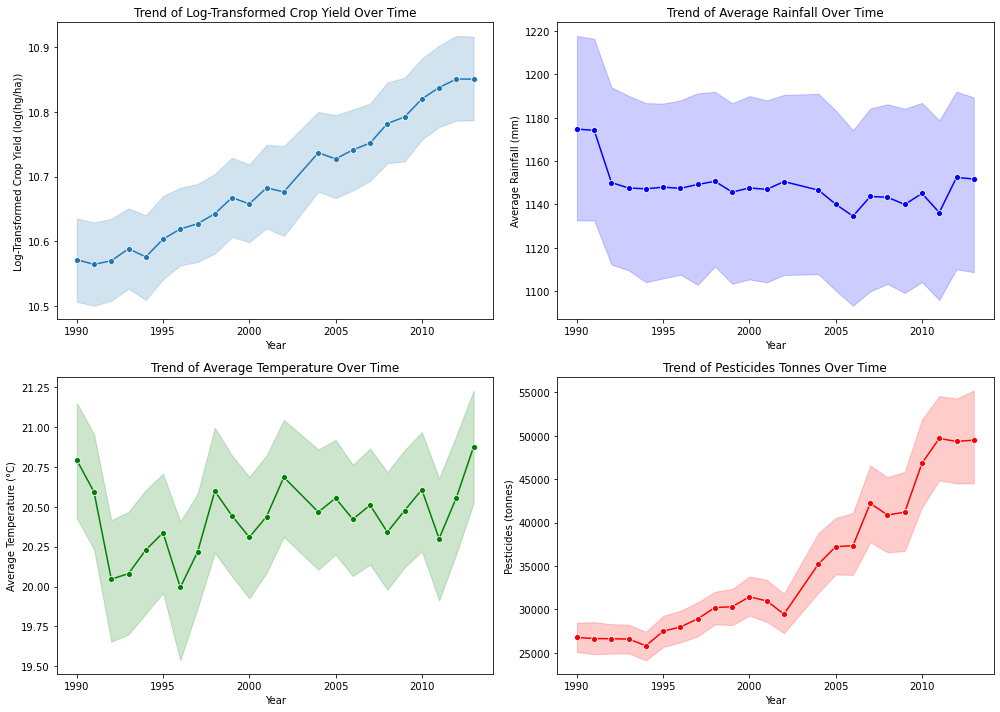

In [61]:
plt.figure(figsize=(14, 10))

# Using the cleaned and transformed data for crop yield
plt.subplot(2, 2, 1)
sns.lineplot(x='Year', y='log_hg/ha_yield', data=cleaned_df, marker='o')
plt.title('Trend of Log-Transformed Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Log-Transformed Crop Yield (log(hg/ha))')

# Original data for average rainfall
plt.subplot(2, 2, 2)
sns.lineplot(x='Year', y='average_rain_fall_mm_per_year', data=cleaned_df, marker='o', color='blue')
plt.title('Trend of Average Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')

# Original data for average temperature
plt.subplot(2, 2, 3)
sns.lineplot(x='Year', y='avg_temp', data=cleaned_df, marker='o', color='green')
plt.title('Trend of Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

# Using the cleaned and transformed data for pesticide tonnes
plt.subplot(2, 2, 4)
sns.lineplot(x='Year', y='pesticides_tonnes', data=cleaned_df, marker='o', color='red')
plt.title('Trend of Pesticides Tonnes Over Time')
plt.xlabel('Year')
plt.ylabel('Pesticides (tonnes)')

plt.tight_layout()
plt.show()

Crop yield and pesticide usage shows an overall upward trend, with minor fluctuations along the way. The trend in pesticide usage over time can correlate with changes in agricultural practices and technological advancements over time in farming.
Average rainfal  exhibits a more erratic behavior, with several peaks and trough but steady.
Average temperature displays a zigzag pattern, with regular upward and downward movements.
Rainfall and Temperature: These variables show their trends over time, which are crucial for understanding environmental impacts on crop production.

In [118]:
# Checking the first five rows of the cleaned df
cleaned_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,log_hg/ha_yield
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,10.508186
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,11.107480
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,10.057667
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,9.433564
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,8.853808


In [63]:
# Checking the number of rows and columns of the cleaned df
cleaned_df.shape

(25874, 8)

In [64]:
# Checking information of the clead df
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25874 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25874 non-null  object 
 1   Item                           25874 non-null  object 
 2   Year                           25874 non-null  int64  
 3   hg/ha_yield                    25874 non-null  int64  
 4   average_rain_fall_mm_per_year  25874 non-null  float64
 5   pesticides_tonnes              25874 non-null  float64
 6   avg_temp                       25874 non-null  float64
 7   log_hg/ha_yield                25874 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.8+ MB


In [85]:
# Dropping unwanted columns
X = cleaned_df.drop(columns=["hg/ha_yield", "log_hg/ha_yield"])  
X

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.00,16.37
1,Albania,Potatoes,1990,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.00,16.37
3,Albania,Sorghum,1990,1485.0,121.00,16.37
4,Albania,Soybeans,1990,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76


In [86]:
# Checking column names
print(cleaned_df.columns)


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'log_hg/ha_yield'],
      dtype='object')


### Data Preprocessing

This will entail;
- Updating the list of numeric and categorical features. Standardizing numeric features  and encoding categorical features using OneHotEncoder.
- Defining and preprocessing feature matrix.
- Defining the target variable i.e. y as the logarithm of the yield (log_hg/ha_yield).
- Spliting the dataset into training and testing sets, with 30% of the data reserved for testing and a random state set for reproducibility.

In [87]:
# Updating the list of numeric and categorical features
numeric_features = ['avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_tonnes'] 
categorical_features = ['Area', 'Item']  # Added Item as a categorical feature

# Setting up the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Applying the preprocessing to the DataFrame
X_preprocessed = preprocessor.fit_transform(X)

# Target variable remains the same
y = cleaned_df['log_hg/ha_yield']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)


### Baseline Model: Linear Regression

In [88]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R^2: {r2_linear}")


Linear Regression MSE: 0.1998351828855151
Linear Regression R^2: 0.8343731022066365


#### Observations 

- Based on MSE value, on average, the squared difference between the actual and predicted values is 0.220. This low MSE value indicate good model performance. It implies that the model's predictions are closer to the actual values.

- R^2 value show that 83% of the variance in the yield is explained by the independent variables included in the linear regression model. With this high proportion being explained, the model fits the data well.

## Visualizing the residuals

This will help in assessing the performance of the linear regression model by visuallly examining the distribution and patterns of residuals

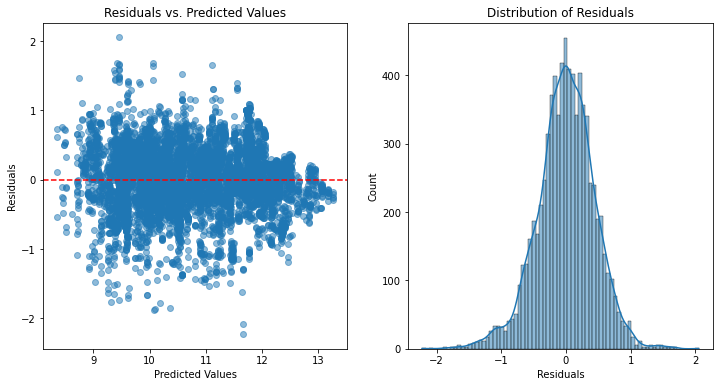

In [89]:
# Calculate residuals
residuals = y_test - y_pred_linear

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residuals Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred_linear, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

# Histogram of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


<Figure size 432x432 with 0 Axes>

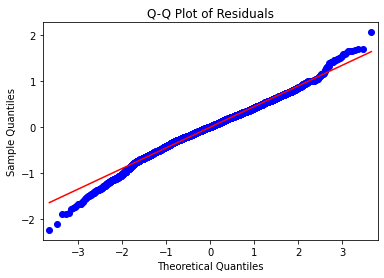

In [90]:
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


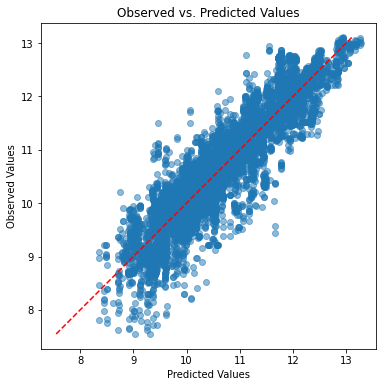

In [91]:
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_linear, y_test, alpha=0.5)
plt.title('Observed vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for reference
plt.show()


In [92]:
# Perform cross-validation
cv_scores = cross_val_score(linear_model, X_preprocessed, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))


Cross-validated R² scores: [0.62425549 0.39021505 0.81166604 0.66412776 0.57958772]
Mean CV R²: 0.6139704114469093


#### Observations 

- These are cross-validated R-squared scores are computed for different folds or subsets of the data during cross-validation. 
- The values range from 0.39 to 0.81. 
- The mean cross-validated R-squared score, which is 0.614. 
- This indicates the overall goodness of fit of the model across all folds.

## Second Model: Polynomial Regression

- This entailed adding polynomial features to the dataset by first creating polynomial features to the specified degree (in this case, 2).
- Then, we fit a linear regression model to the transformed dataset and evaluates the model's performance.

In [93]:
# Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Refit the linear model with polynomial features
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_poly, y_train)
y_pred_poly = linear_model_poly.predict(poly.transform(X_test))

# Evaluate the new model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression R²: {r2_poly}")


Polynomial Regression MSE: 0.04639518157983211
Polynomial Regression R²: 0.9615468613350748


#### Observations 

- The Polynomial Regression model achieves a mean squared error of approximately 0.046 and an R-squared score of approximately 0.962 on the test data. This indicates that the model fits the data quite well since it explains about 96.2% of the variance in the target variable.

### Regularization 

Applying ridge regression and Lasso regression to penalize large coefficients and prevent overfitting. 

In [94]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Elastic Net Regression
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_test)

# Evaluation
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Elastic Net R²:", r2_score(y_test, y_pred_elastic))


Ridge R²: 0.834294737548852
Lasso R²: 0.23501741484874383
Elastic Net R²: 0.42676096969280675


#### Observations

- These scores show how well each regularization technique performs in explaining the variance in the data. From the results, Ridge regression outperforms Lasso and Elastic Net

In [95]:
ridge_cv_scores = cross_val_score(ridge_model, X_preprocessed, y, cv=5, scoring='r2')
print("Ridge CV R² scores:", ridge_cv_scores)
print("Ridge Mean CV R²:", np.mean(ridge_cv_scores))


Ridge CV R² scores: [0.63439349 0.39987477 0.81302285 0.66931698 0.58632902]
Ridge Mean CV R²: 0.6205874223756356


 #### Observations
 
 - The model explains around 62.1% of the variance in the in yield across different folds. This show that it achieves a reasonably good fit to the data.

## Third model: Decision Tree Regression

Decision Tree MSE: 0.4086977416052988
Decision Tree R²: 0.6612641572929656


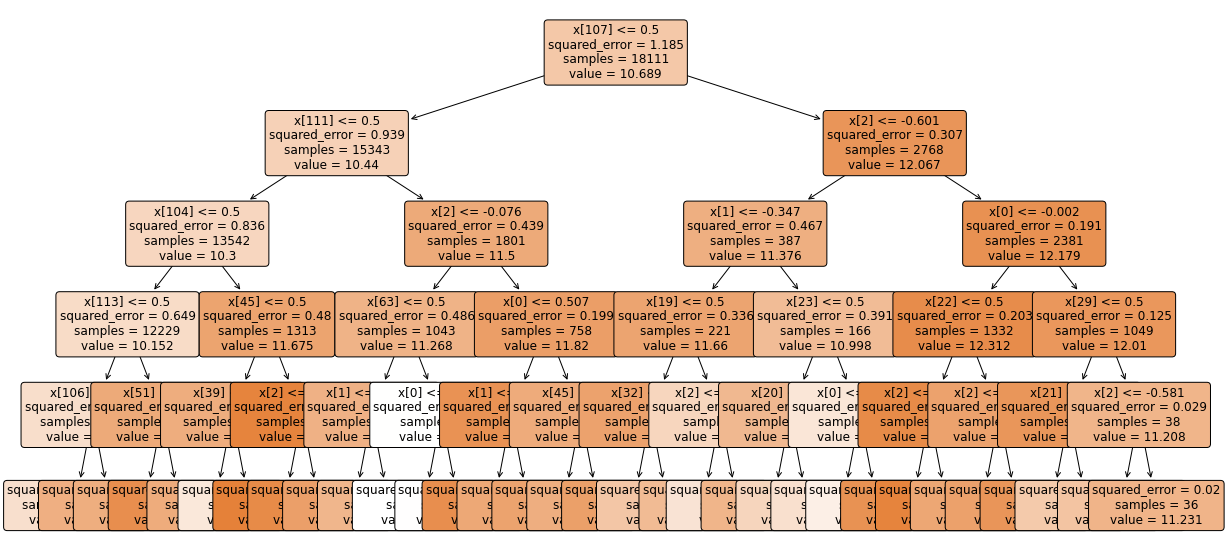

In [79]:
# Initializing the DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fitting the model on the training data
tree_regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred_tree = tree_regressor.predict(X_test)

# Evaluating the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R²: {r2_tree}")

# visualize the tree

plt.figure(figsize=(20,10))
tree.plot_tree(tree_regressor, filled=True, rounded=True, fontsize=12)
plt.show()


#### Observations 

- The Decision Tree model explains approximately 66.1% of the variance in the yield. This indicates that it has a moderate level of predictive performance.

In [80]:
# Define the model
tree_regressor = DecisionTreeRegressor(random_state=42)

# Create a parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated R² score: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_tree = grid_search.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)

# Evaluate the best model
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
r2_best_tree = r2_score(y_test, y_pred_best_tree)
print(f"Optimized Decision Tree MSE: {mse_best_tree}")
print(f"Optimized Decision Tree R²: {r2_best_tree}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\base.py", line 638, in _validate_para

Best parameters found:  {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validated R² score:  0.9524601917666111
Optimized Decision Tree MSE: 0.04666464375697557
Optimized Decision Tree R²: 0.961323526365584


#### Observations

The cross-validation was performed to optimize the hyperparameters of the decision tree model. It tested 144 combinations of hyperparameters, with 5-fold cross-validation for each, totaling 720 fits. The best combination of hyperparameters found by the grid search is:

- max_depth: 30
- max_features: None
- min_samples_leaf: 5
- min_samples_split: 2
The corresponding best cross-validated R square score achieved with these parameters is approximately 95.25%.

After optimizing the decision tree model with these parameters, the mean squared error (MSE) on the test set is approximately 0.0467, and the coefficient of determination (R square) score is approximately 0.9613. Therefore, the optimized decision tree model performs well in predicting the yield compared to the baseline. 

## Fourth model: Random Forest Regression

In [82]:
# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")

# Feature Importance
feature_importances = random_forest.feature_importances_
# Assuming we have feature names in a list called 'feature_names'
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df.head())


Random Forest MSE: 0.03598426348885564
Random Forest R²: 0.970175612497362
                      Feature  Importance
107        cat__Item_Potatoes    0.289984
104         cat__Item_Cassava    0.123636
111  cat__Item_Sweet potatoes    0.111168
2      num__pesticides_tonnes    0.083145
0               num__avg_temp    0.065188


#### Observations

- The MSE of approximately 0.036 indicate that, on average, the squared difference between predicted and actual values is small, which implies that the model had good performance.
- Similarly, the R² show that the model explains around 97.02% of the variance in the yield. This points to a high level of explanatory power.
- Additionally, the feature importance table shows the top 5 most important features for the random forest model. 
- Potatoes as an item category appears to be the most important feature, followed by 'Cassava' and 'Sweet potatoes'. 
- Pesticides and average temperature also contribute significantly to the model's predictions.

### Hyperparameter Tuning of the Random Forest

In [115]:
# Set up parameter grid to tune the hyperparameters
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R²:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best R²: 0.9643129481921879


Our untuned random forest model had a better performance at 97% compared to the tuned model at 96.4% R squared score.

## Fifth model: Gradient Boosting Regression

In [96]:
# Initialize the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R²: {r2_gb}")

# Feature Importance
feature_importances_gb = gb_regressor.feature_importances_
importance_df_gb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_gb}).sort_values(by='Importance', ascending=False)
print(importance_df_gb.head())


Gradient Boosting MSE: 0.1715849010296846
Gradient Boosting R²: 0.8577874303444897
                      Feature  Importance
107        cat__Item_Potatoes    0.323067
104         cat__Item_Cassava    0.122639
111  cat__Item_Sweet potatoes    0.104985
110        cat__Item_Soybeans    0.080928
109         cat__Item_Sorghum    0.071079


#### Observations

- The MSE is approximately 0.172 implying that, on average, the squared difference between predicted and actual values is relatively small. Thus the model had good performance.
- The R squared value indicates that the model explains around 85.79% of the variance in the yield. This can be considered as having a moderately high level of explanatory power.
- The feature importance table displays the top 5 most important features for the gradient boosting model. 
- Potatoes is the most important feature, followed by 'Cassava', 'Sweet potatoes', 'Soybeans', and 'Sorghum'. These features contribute significantly to the model's predictions.


### Hyperparameter tuning of Gradient Boosting Regression

In [97]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01]
}

grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid_gb, cv=3, scoring='r2', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best R² for Gradient Boosting:", grid_search_gb.best_score_)


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best R² for Gradient Boosting: 0.9526119590146087


#### Observations
After tuning of hyperparamenter the R square of the gradient boosting regression improved from 85.78% to 95.26% implying that its predictive power have significantly improved.

### Support Vector Regression (SVR)

In [102]:
# Initialize the SVR
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF kernel, adjust C and epsilon as needed

# Fit the model on the training data
svr_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = svr_regressor.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}")
print(f"SVR R²: {r2_svr}")


SVR MSE: 0.05507449827262007
SVR R²: 0.9543532917241812


#### Observations
- The MSE score of 0.055 implying that on average, the squared difference between predicted and actual values is relatively small. Thus the model had good performance
- The R squared score of 95.44% indicate that the model explains a high level of variations in yiled implying that the model performed well.

### Hyparameter tuning of SVR

In [103]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf']
}

grid_search_svr = GridSearchCV(estimator=svr_regressor, param_grid=param_grid_svr, cv=3, scoring='r2', verbose=1, n_jobs=4)
grid_search_svr.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters for SVR:", grid_search_svr.best_params_)
print("Best R² for SVR:", grid_search_svr.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for SVR: {'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best R² for SVR: 0.9546782982841023


#### Observations

The tuning had marginal effect on R squared noting that it moved from 95.44% to 95.46% though the model remain strong in predictive performance

### Neural Network Regression with MLPRegressor

In [95]:
# Initialize the MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                             batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200,
                             random_state=42, verbose=True, n_iter_no_change=10, tol=0.0001)

# Fit the model on the training data
mlp_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp_regressor.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"MLP MSE: {mse_mlp}")
print(f"MLP R²: {r2_mlp}")


Iteration 1, loss = 39.34146988
Iteration 2, loss = 7.73673101
Iteration 3, loss = 0.55064848
Iteration 4, loss = 0.23492475
Iteration 5, loss = 0.14596532
Iteration 6, loss = 0.12126341
Iteration 7, loss = 0.11235574
Iteration 8, loss = 0.10713584
Iteration 9, loss = 0.10305306
Iteration 10, loss = 0.09951730
Iteration 11, loss = 0.09615045
Iteration 12, loss = 0.09306647
Iteration 13, loss = 0.08999755
Iteration 14, loss = 0.08733050
Iteration 15, loss = 0.08453970
Iteration 16, loss = 0.08192200
Iteration 17, loss = 0.07923180
Iteration 18, loss = 0.07656231
Iteration 19, loss = 0.07370964
Iteration 20, loss = 0.07082408
Iteration 21, loss = 0.06787176
Iteration 22, loss = 0.06490447
Iteration 23, loss = 0.06189105
Iteration 24, loss = 0.05867866
Iteration 25, loss = 0.05578681
Iteration 26, loss = 0.05316008
Iteration 27, loss = 0.05085868
Iteration 28, loss = 0.04859693
Iteration 29, loss = 0.04673977
Iteration 30, loss = 0.04497865
Iteration 31, loss = 0.04342443
Iteration 32, lo

#### Observations 

From the outputs of Multi-layer Perceptron (MLP) regressor training process show that; 

- The training loss decreases over multiple iterations, indicating the optimization of the model's parameters.
- The iterations start with a high loss value, gradually decreasing to a significantly lower valuewhich points to the model's learning process.
- The training process stopped after 106 iterations due to no significant improvement in the training loss for ten consecutive epochs, suggesting that the model has converged.
- The final mean squared error (MSE) achieved by the MLP model is approximately 0.055 thus small average squared difference between predicted and actual values.
- R squared shows that that the model explains around 95.48% of the variance in the target variable, thus strong predictive performance.

### Hyperparameter Tuning

In [104]:
# Initialize the MLPRegressor with very basic settings
mlp_regressor = MLPRegressor(max_iter=300, random_state=42, solver='lbfgs')  # Changed solver to 'lbfgs' for stability

# Define an even more restricted parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,)],  # Single layer with fewer neurons
    'activation': ['tanh'],  # Only one activation function
}

# Set up GridSearchCV with no parallel jobs
grid_search_mlp = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid_mlp, cv=3, scoring='r2', verbose=1, n_jobs=1)

# Fit GridSearchCV

grid_search_mlp.fit(X_train, y_train)
print("Best parameters for MLP:", grid_search_mlp.best_params_)
print("Best R² for MLP:", grid_search_mlp.best_score_)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWa

Best parameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50,)}
Best R² for MLP: 0.9527415299844436


C:\Users\HP\anaconda3\Anaconda4\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Observations
The R square score show that the model explains approximately 95.27% of the variance in the data. This implies that that the model fits the data very well.

Our best performed model was the untuned Random forest with an R spuared score of 97%.

### Time Series Analysis

In [106]:
# Checking the first few rows of the data
yield_df.head()

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,log_hg/ha_yield
Year,,,,,,,
1990-01-01,Albania,Maize,36613,1485.0,121.00,16.37,10.508186
1990-01-01,Malaysia,"Rice, paddy",27694,2875.0,39406.48,27.21,10.229007
1990-01-01,Malaysia,Soybeans,3333,2875.0,39406.48,27.21,8.111928
1990-01-01,Malaysia,Sweet potatoes,110000,2875.0,39406.48,27.21,11.608245
1990-01-01,Sri Lanka,Cassava,87717,1712.0,1571.33,26.53,11.381882


In [107]:
# Indexing the year
yield_df.index.unique

<bound method Index.unique of DatetimeIndex(['1990-01-01', '1990-01-01', '1990-01-01', '1990-01-01',
               '1990-01-01', '1990-01-01', '1990-01-01', '1990-01-01',
               '1990-01-01', '1990-01-01',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Year', length=25932, freq=None)>

In [109]:
# checking the dataset information
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25932 entries, 1990-01-01 to 2013-01-01
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   hg/ha_yield                    25932 non-null  int64  
 3   average_rain_fall_mm_per_year  25932 non-null  float64
 4   pesticides_tonnes              25932 non-null  float64
 5   avg_temp                       25932 non-null  float64
 6   log_hg/ha_yield                25932 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [110]:
# Print current frequency
print("Current frequency:", yield_df.index.freq)

Current frequency: None


In [111]:
# Aggregate data annually by taking the mean for numeric columns
annual_data = yield_df.groupby(yield_df.index.year).mean()

# Creating a new DateTimeIndex with annual start frequency
new_index = pd.date_range(start=annual_data.index.min(), periods=len(annual_data), freq='AS')

# Assign the new index to the DataFrame
annual_data.index = new_index

# Verify the data
print(annual_data.head())


                                hg/ha_yield  average_rain_fall_mm_per_year  \
1970-01-01 00:00:00.000001990  66722.149577                    1173.798683   
1971-01-01 00:00:00.000001990  66496.037629                    1173.238946   
1972-01-01 00:00:00.000001990  66934.412966                    1146.683837   
1973-01-01 00:00:00.000001990  67568.484956                    1144.375221   
1974-01-01 00:00:00.000001990  68371.559353                    1145.901079   

                               pesticides_tonnes   avg_temp  log_hg/ha_yield  
1970-01-01 00:00:00.000001990       26746.808363  20.800950        10.568582  
1971-01-01 00:00:00.000001990       26620.161232  20.600640        10.561526  
1972-01-01 00:00:00.000001990       26461.027007  20.030382        10.545540  
1973-01-01 00:00:00.000001990       26463.000204  20.061327        10.570950  
1974-01-01 00:00:00.000001990       25776.272716  20.226709        10.567910  


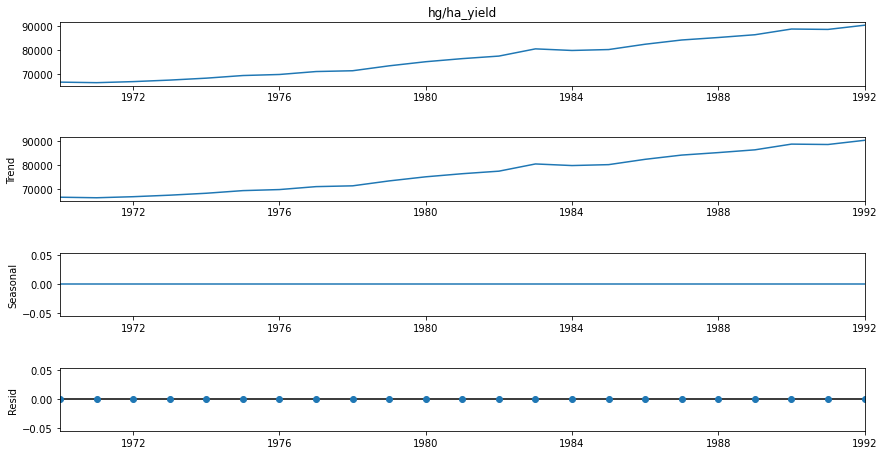

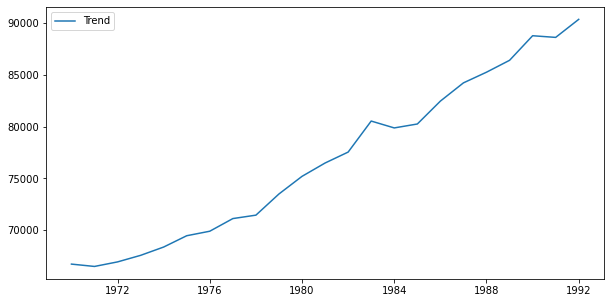

In [112]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(annual_data['hg/ha_yield'], model='additive')

# Plotting the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

# Optionally, you can also extract the specific components like this:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# If you want to view the trend component separately:
plt.figure(figsize=(10, 5))
plt.plot(trend, label='Trend')
plt.legend()
plt.show()


### Checking for stationarity

### Augmented Dickey Fuller Test

In [113]:
# Perform the Augmented Dickey-Fuller test to check for stationarity
result = adfuller(annual_data['hg/ha_yield'])

# Output the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.2698324680015443
p-value: 0.18188223340505494
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


### Observations

Since the ADF statistic is greater than the critical values at all significance levels, we fail to reject the null hypothesis, implying that the time series is non-stationary.

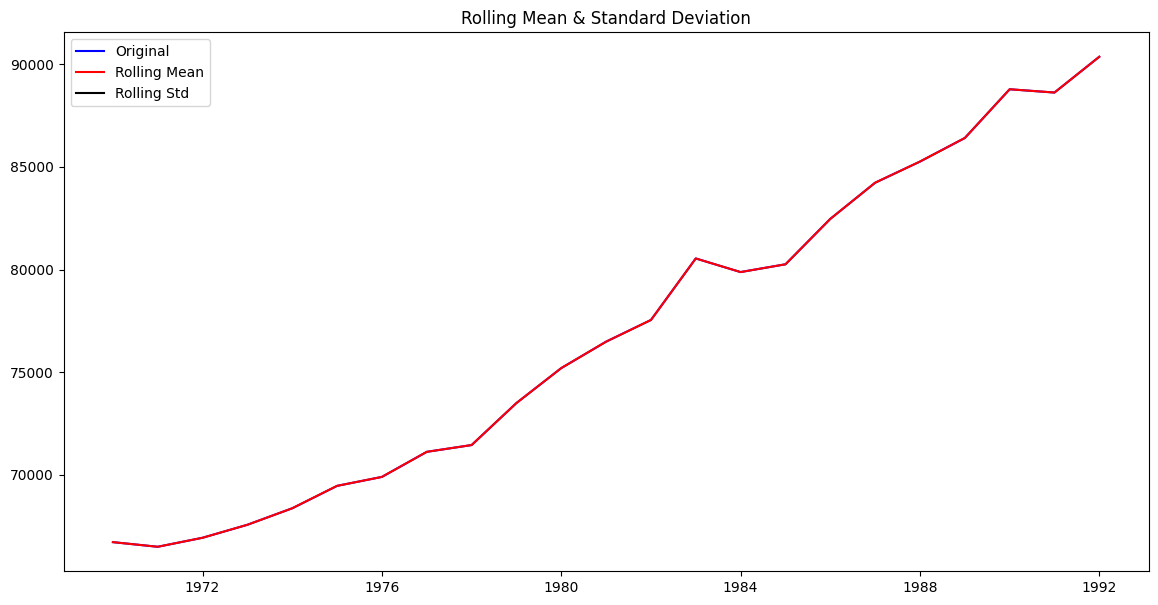

In [98]:
# Calculate the rolling mean and rolling standard deviation
rolling_mean = annual_data['hg/ha_yield'].rolling(window=1).mean()  # The window size can be adjusted
rolling_std = annual_data['hg/ha_yield'].rolling(window=1).std()

# Plot the original data, the rolling mean, and the rolling standard deviation
plt.figure(figsize=(14, 7))
plt.plot(annual_data['hg/ha_yield'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


#### Observations

The data is not stationary as it exhits upwards change of the mean

# Conclusion

Based on the analysis and findings, the following conclusions were drawn:
- Crop yields have shown an overall increasing trend over time, along with an upward trend in pesticide usage. This indicate that there have been significant changes in agricultural practices and intensification.

- While average rainfall and temperature exhibit fluctuations, there is no clear long-term trend observed in the data. This suggest the need for further investigation into the impacts of climate change on these variables.

- The correlation analysis revealed that crop yield has moderate positive correlations with irrigation water usage, water availability, and precipitation. This demonstrate the importance of water resources for agricultural productivity.

- The machine learning models, particularly Random Forest Regression, Gradient Boosting Regression, and Support Vector Regression, demonstrated strong predictive performance. They had R-squared values above 95%, indicating their effectiveness in forecasting crop yields based on the given input variables.

- Time series analysis revealed non-stationary behavior in crop yield data. This is due to the presence of underlying trends or patterns that need to be accounted for in forecasting models.

## Recommendations

We recommend the following; 
- Implement advanced machine learning models, such as Random Forest Regression, Gradient Boosting Regression, or Support Vector Regression, to improve crop yield forecasting capabilities, as they have shown superior performance compared to traditional linear regression models.

- Prioritize water resource management strategies, including efficient irrigation practices, rainwater harvesting, and infrastructure development, as water availability and irrigation water usage significantly impact crop yields.

- Promote sustainable agricultural practices that optimize pesticide usage while maintaining productivity, as excessive reliance on pesticides may have long-term environmental implications.

- Invest in research and development to develop crop varieties that are more resilient to changing climatic conditions, such as drought-resistant or heat-tolerant varieties, to mitigate the potential impacts of climate change on agriculture.

- Incorporate time series analysis techniques, such as trend and seasonal decomposition, into forecasting models to account for non-stationarity and capture long-term patterns and seasonality in crop yield data.

- Strengthen collaborations between agricultural researchers, policymakers, and farmers to facilitate the effective dissemination and adoption of data-driven insights, best practices, and innovative technologies for sustainable and climate-resilient agriculture.

- Continuously monitor and update the forecasting models with new data as it becomes available, ensuring that the models remain relevant and accurately reflect evolving climatic conditions and agricultural practices.